In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
folder_path = r'D:\agriaku\agriaku_20230804_qcm_dataset-master\dataset'
dfs = {}

for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        name = os.path.splitext(filename)[0]
        file_path = os.path.join(folder_path, filename)
        dfs[name] = pd.read_csv(file_path,delimiter=';')


In [4]:
df1 = dfs['QCM3']
df2 = dfs['QCM6']
df3 = dfs['QCM7']
df4 = dfs['QCM10']
df5 = dfs['QCM12']

In [5]:
dfd = pd.concat([df1,df2,df3,df4,df5],ignore_index=True)

In [6]:
dfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   0.799_0.201_MIP  125 non-null    float64
 1   0.799_0.201_NP   125 non-null    float64
 2   0.700_0.300_MIP  125 non-null    float64
 3   0.700_0.300_NP   125 non-null    float64
 4   0.600_0.400_MIP  125 non-null    float64
 5   0.600_0.400_NP   125 non-null    float64
 6   0.501_0.499_MIP  125 non-null    float64
 7   0.501_0.499_NP   125 non-null    float64
 8   0.400_0.600_MIP  125 non-null    float64
 9   0.400_0.600_NP   125 non-null    float64
 10  1-Octanol        125 non-null    int64  
 11  1-Propanol       125 non-null    int64  
 12  2-Butanol        125 non-null    int64  
 13  2-propanol       125 non-null    int64  
 14  1-isobutanol     125 non-null    int64  
dtypes: float64(10), int64(5)
memory usage: 14.8 KB


We have already done data exploration, we will focus on build model using ANN

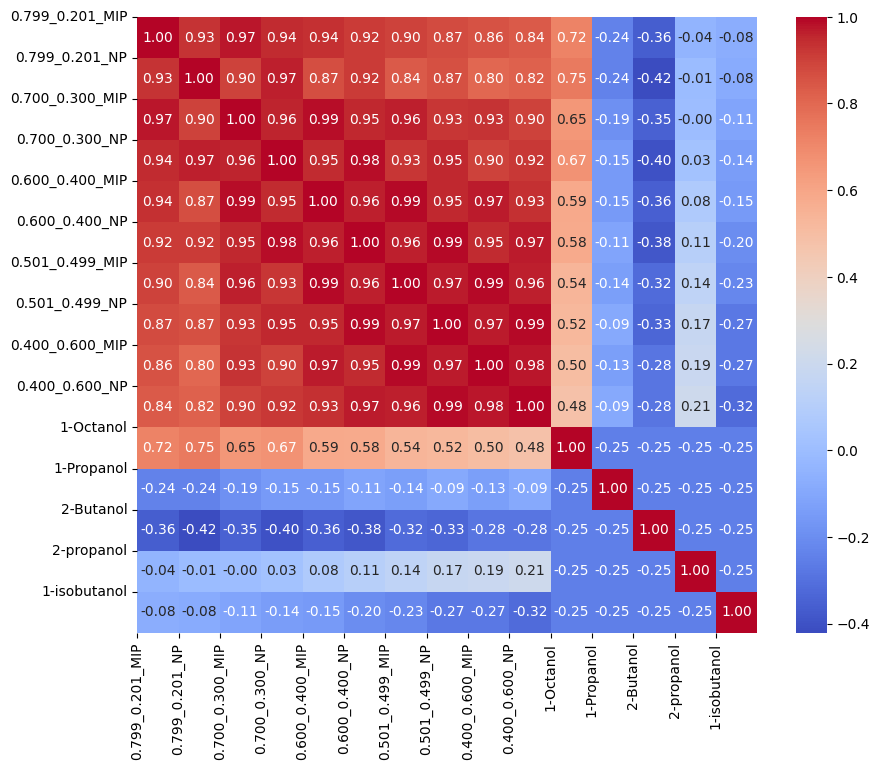

In [7]:
corr = dfd.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 8))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [8]:
X = dfd.iloc[:, 0:10].values
y = dfd.iloc[:, [10,11,12,13,14]].values

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
###importing keras library
import keras
from keras.models import Sequential
from keras.layers import Dense

In [12]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the second hidden layer
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'softmax'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history = classifier.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size = 50, epochs = 5000, verbose = 1)

Epoch 1/5000
2/2 [==============================] - 3s 692ms/step - loss: 1.6095 - accuracy: 0.3000 - val_loss: 1.6097 - val_accuracy: 0.1200
Epoch 2/5000
2/2 [==============================] - 0s 79ms/step - loss: 1.6092 - accuracy: 0.2200 - val_loss: 1.6098 - val_accuracy: 0.1200
Epoch 3/5000
2/2 [==============================] - 0s 78ms/step - loss: 1.6091 - accuracy: 0.2200 - val_loss: 1.6099 - val_accuracy: 0.1200
Epoch 4/5000
2/2 [==============================] - 0s 79ms/step - loss: 1.6089 - accuracy: 0.2200 - val_loss: 1.6100 - val_accuracy: 0.1200
Epoch 5/5000
2/2 [==============================] - 0s 70ms/step - loss: 1.6087 - accuracy: 0.2700 - val_loss: 1.6101 - val_accuracy: 0.1200
Epoch 6/5000
2/2 [==============================] - 0s 74ms/step - loss: 1.6084 - accuracy: 0.2700 - val_loss: 1.6101 - val_accuracy: 0.1200
Epoch 7/5000
2/2 [==============================] - 0s 65ms/step - loss: 1.6082 - accuracy: 0.2800 - val_loss: 1.6102 - val_accuracy: 0.2000
Epoch 8/5000

Epoch 59/5000
2/2 [==============================] - 0s 74ms/step - loss: 1.3433 - accuracy: 0.3900 - val_loss: 1.5357 - val_accuracy: 0.2400
Epoch 60/5000
2/2 [==============================] - 0s 74ms/step - loss: 1.3393 - accuracy: 0.3900 - val_loss: 1.5358 - val_accuracy: 0.2400
Epoch 61/5000
2/2 [==============================] - 0s 66ms/step - loss: 1.3360 - accuracy: 0.3900 - val_loss: 1.5361 - val_accuracy: 0.2400
Epoch 62/5000
2/2 [==============================] - 0s 64ms/step - loss: 1.3321 - accuracy: 0.3900 - val_loss: 1.5360 - val_accuracy: 0.2400
Epoch 63/5000
2/2 [==============================] - 0s 77ms/step - loss: 1.3290 - accuracy: 0.3900 - val_loss: 1.5351 - val_accuracy: 0.2400
Epoch 64/5000
2/2 [==============================] - 0s 86ms/step - loss: 1.3257 - accuracy: 0.3900 - val_loss: 1.5339 - val_accuracy: 0.2400
Epoch 65/5000
2/2 [==============================] - 0s 72ms/step - loss: 1.3228 - accuracy: 0.3900 - val_loss: 1.5327 - val_accuracy: 0.2400
Epoch 

2/2 [==============================] - 0s 72ms/step - loss: 1.1992 - accuracy: 0.3500 - val_loss: 1.4088 - val_accuracy: 0.2000
Epoch 117/5000
2/2 [==============================] - 0s 66ms/step - loss: 1.1968 - accuracy: 0.3500 - val_loss: 1.4063 - val_accuracy: 0.2000
Epoch 118/5000
2/2 [==============================] - 0s 67ms/step - loss: 1.1944 - accuracy: 0.3500 - val_loss: 1.4037 - val_accuracy: 0.2000
Epoch 119/5000
2/2 [==============================] - 0s 73ms/step - loss: 1.1917 - accuracy: 0.3500 - val_loss: 1.4016 - val_accuracy: 0.2000
Epoch 120/5000
2/2 [==============================] - 0s 78ms/step - loss: 1.1895 - accuracy: 0.3500 - val_loss: 1.3994 - val_accuracy: 0.2000
Epoch 121/5000
2/2 [==============================] - 0s 79ms/step - loss: 1.1870 - accuracy: 0.3500 - val_loss: 1.3964 - val_accuracy: 0.2000
Epoch 122/5000
2/2 [==============================] - 0s 87ms/step - loss: 1.1845 - accuracy: 0.3500 - val_loss: 1.3938 - val_accuracy: 0.2000
Epoch 123/5000

2/2 [==============================] - 0s 77ms/step - loss: 1.0789 - accuracy: 0.4200 - val_loss: 1.2888 - val_accuracy: 0.3600
Epoch 174/5000
2/2 [==============================] - 0s 73ms/step - loss: 1.0772 - accuracy: 0.4200 - val_loss: 1.2870 - val_accuracy: 0.3600
Epoch 175/5000
2/2 [==============================] - 0s 84ms/step - loss: 1.0758 - accuracy: 0.4200 - val_loss: 1.2862 - val_accuracy: 0.3600
Epoch 176/5000
2/2 [==============================] - 0s 72ms/step - loss: 1.0743 - accuracy: 0.4300 - val_loss: 1.2843 - val_accuracy: 0.3600
Epoch 177/5000
2/2 [==============================] - 0s 81ms/step - loss: 1.0727 - accuracy: 0.4300 - val_loss: 1.2829 - val_accuracy: 0.3600
Epoch 178/5000
2/2 [==============================] - 0s 75ms/step - loss: 1.0714 - accuracy: 0.4300 - val_loss: 1.2817 - val_accuracy: 0.3600
Epoch 179/5000
2/2 [==============================] - 0s 61ms/step - loss: 1.0698 - accuracy: 0.4400 - val_loss: 1.2801 - val_accuracy: 0.3600
Epoch 180/5000

2/2 [==============================] - 0s 74ms/step - loss: 1.0150 - accuracy: 0.5100 - val_loss: 1.2236 - val_accuracy: 0.3600
Epoch 231/5000
2/2 [==============================] - 0s 69ms/step - loss: 1.0140 - accuracy: 0.5100 - val_loss: 1.2231 - val_accuracy: 0.3600
Epoch 232/5000
2/2 [==============================] - 0s 66ms/step - loss: 1.0130 - accuracy: 0.5100 - val_loss: 1.2224 - val_accuracy: 0.3600
Epoch 233/5000
2/2 [==============================] - 0s 67ms/step - loss: 1.0123 - accuracy: 0.5100 - val_loss: 1.2209 - val_accuracy: 0.3600
Epoch 234/5000
2/2 [==============================] - 0s 78ms/step - loss: 1.0113 - accuracy: 0.5100 - val_loss: 1.2198 - val_accuracy: 0.3600
Epoch 235/5000
2/2 [==============================] - 0s 80ms/step - loss: 1.0105 - accuracy: 0.5100 - val_loss: 1.2184 - val_accuracy: 0.3600
Epoch 236/5000
2/2 [==============================] - 0s 79ms/step - loss: 1.0098 - accuracy: 0.5100 - val_loss: 1.2177 - val_accuracy: 0.3600
Epoch 237/5000

2/2 [==============================] - 0s 80ms/step - loss: 0.9710 - accuracy: 0.5400 - val_loss: 1.1730 - val_accuracy: 0.4400
Epoch 288/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.9704 - accuracy: 0.5400 - val_loss: 1.1729 - val_accuracy: 0.4400
Epoch 289/5000
2/2 [==============================] - 0s 74ms/step - loss: 0.9693 - accuracy: 0.5400 - val_loss: 1.1725 - val_accuracy: 0.4400
Epoch 290/5000
2/2 [==============================] - 0s 94ms/step - loss: 0.9687 - accuracy: 0.5400 - val_loss: 1.1712 - val_accuracy: 0.4400
Epoch 291/5000
2/2 [==============================] - 0s 80ms/step - loss: 0.9679 - accuracy: 0.5400 - val_loss: 1.1707 - val_accuracy: 0.4400
Epoch 292/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.9672 - accuracy: 0.5400 - val_loss: 1.1698 - val_accuracy: 0.4400
Epoch 293/5000
2/2 [==============================] - 0s 81ms/step - loss: 0.9665 - accuracy: 0.5400 - val_loss: 1.1695 - val_accuracy: 0.4400
Epoch 294/5000

2/2 [==============================] - 0s 66ms/step - loss: 0.9272 - accuracy: 0.5500 - val_loss: 1.1204 - val_accuracy: 0.4800
Epoch 345/5000
2/2 [==============================] - 0s 66ms/step - loss: 0.9264 - accuracy: 0.5500 - val_loss: 1.1200 - val_accuracy: 0.4800
Epoch 346/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.9255 - accuracy: 0.5500 - val_loss: 1.1194 - val_accuracy: 0.4800
Epoch 347/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.9245 - accuracy: 0.5600 - val_loss: 1.1181 - val_accuracy: 0.4800
Epoch 348/5000
2/2 [==============================] - 0s 82ms/step - loss: 0.9236 - accuracy: 0.5600 - val_loss: 1.1172 - val_accuracy: 0.4800
Epoch 349/5000
2/2 [==============================] - 0s 75ms/step - loss: 0.9223 - accuracy: 0.5600 - val_loss: 1.1159 - val_accuracy: 0.4800
Epoch 350/5000
2/2 [==============================] - 0s 87ms/step - loss: 0.9213 - accuracy: 0.5600 - val_loss: 1.1150 - val_accuracy: 0.4800
Epoch 351/5000

2/2 [==============================] - 0s 78ms/step - loss: 0.8137 - accuracy: 0.6500 - val_loss: 1.0190 - val_accuracy: 0.4400
Epoch 402/5000
2/2 [==============================] - 0s 95ms/step - loss: 0.8114 - accuracy: 0.6500 - val_loss: 1.0174 - val_accuracy: 0.4800
Epoch 403/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.8089 - accuracy: 0.6500 - val_loss: 1.0157 - val_accuracy: 0.4400
Epoch 404/5000
2/2 [==============================] - 0s 94ms/step - loss: 0.8067 - accuracy: 0.6500 - val_loss: 1.0133 - val_accuracy: 0.4400
Epoch 405/5000
2/2 [==============================] - 0s 80ms/step - loss: 0.8041 - accuracy: 0.6500 - val_loss: 1.0112 - val_accuracy: 0.4400
Epoch 406/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.8019 - accuracy: 0.6500 - val_loss: 1.0098 - val_accuracy: 0.4400
Epoch 407/5000
2/2 [==============================] - 0s 71ms/step - loss: 0.7996 - accuracy: 0.6500 - val_loss: 1.0086 - val_accuracy: 0.4400
Epoch 408/5000

2/2 [==============================] - 0s 77ms/step - loss: 0.7035 - accuracy: 0.6500 - val_loss: 0.9344 - val_accuracy: 0.4400
Epoch 459/5000
2/2 [==============================] - 0s 97ms/step - loss: 0.7021 - accuracy: 0.6500 - val_loss: 0.9326 - val_accuracy: 0.4400
Epoch 460/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.7005 - accuracy: 0.6500 - val_loss: 0.9320 - val_accuracy: 0.4400
Epoch 461/5000
2/2 [==============================] - 0s 71ms/step - loss: 0.6990 - accuracy: 0.6500 - val_loss: 0.9306 - val_accuracy: 0.4800
Epoch 462/5000
2/2 [==============================] - 0s 112ms/step - loss: 0.6979 - accuracy: 0.6500 - val_loss: 0.9294 - val_accuracy: 0.4800
Epoch 463/5000
2/2 [==============================] - 0s 80ms/step - loss: 0.6961 - accuracy: 0.6500 - val_loss: 0.9288 - val_accuracy: 0.4800
Epoch 464/5000
2/2 [==============================] - 0s 95ms/step - loss: 0.6947 - accuracy: 0.6500 - val_loss: 0.9274 - val_accuracy: 0.4800
Epoch 465/500

2/2 [==============================] - 0s 94ms/step - loss: 0.6326 - accuracy: 0.7000 - val_loss: 0.8597 - val_accuracy: 0.5200
Epoch 516/5000
2/2 [==============================] - 0s 112ms/step - loss: 0.6314 - accuracy: 0.7000 - val_loss: 0.8589 - val_accuracy: 0.5200
Epoch 517/5000
2/2 [==============================] - 0s 82ms/step - loss: 0.6300 - accuracy: 0.7000 - val_loss: 0.8572 - val_accuracy: 0.5200
Epoch 518/5000
2/2 [==============================] - 0s 97ms/step - loss: 0.6292 - accuracy: 0.7000 - val_loss: 0.8556 - val_accuracy: 0.5200
Epoch 519/5000
2/2 [==============================] - 0s 94ms/step - loss: 0.6280 - accuracy: 0.7000 - val_loss: 0.8542 - val_accuracy: 0.5200
Epoch 520/5000
2/2 [==============================] - 0s 84ms/step - loss: 0.6270 - accuracy: 0.7000 - val_loss: 0.8526 - val_accuracy: 0.5200
Epoch 521/5000
2/2 [==============================] - 0s 105ms/step - loss: 0.6263 - accuracy: 0.7000 - val_loss: 0.8519 - val_accuracy: 0.5200
Epoch 522/50

2/2 [==============================] - 0s 80ms/step - loss: 0.5746 - accuracy: 0.7300 - val_loss: 0.7879 - val_accuracy: 0.6800
Epoch 573/5000
2/2 [==============================] - 0s 80ms/step - loss: 0.5736 - accuracy: 0.7300 - val_loss: 0.7868 - val_accuracy: 0.6800
Epoch 574/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.5728 - accuracy: 0.7300 - val_loss: 0.7852 - val_accuracy: 0.6800
Epoch 575/5000
2/2 [==============================] - 0s 74ms/step - loss: 0.5718 - accuracy: 0.7400 - val_loss: 0.7841 - val_accuracy: 0.6800
Epoch 576/5000
2/2 [==============================] - 0s 79ms/step - loss: 0.5708 - accuracy: 0.7400 - val_loss: 0.7841 - val_accuracy: 0.6800
Epoch 577/5000
2/2 [==============================] - 0s 79ms/step - loss: 0.5699 - accuracy: 0.7400 - val_loss: 0.7841 - val_accuracy: 0.6800
Epoch 578/5000
2/2 [==============================] - 0s 76ms/step - loss: 0.5691 - accuracy: 0.7300 - val_loss: 0.7840 - val_accuracy: 0.6800
Epoch 579/5000

2/2 [==============================] - 0s 61ms/step - loss: 0.5251 - accuracy: 0.7800 - val_loss: 0.7260 - val_accuracy: 0.7600
Epoch 630/5000
2/2 [==============================] - 0s 89ms/step - loss: 0.5240 - accuracy: 0.7800 - val_loss: 0.7248 - val_accuracy: 0.7600
Epoch 631/5000
2/2 [==============================] - 0s 80ms/step - loss: 0.5233 - accuracy: 0.7800 - val_loss: 0.7247 - val_accuracy: 0.7600
Epoch 632/5000
2/2 [==============================] - 0s 89ms/step - loss: 0.5223 - accuracy: 0.7800 - val_loss: 0.7237 - val_accuracy: 0.7600
Epoch 633/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.5216 - accuracy: 0.7800 - val_loss: 0.7229 - val_accuracy: 0.7600
Epoch 634/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.5211 - accuracy: 0.7800 - val_loss: 0.7229 - val_accuracy: 0.7600
Epoch 635/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.5202 - accuracy: 0.7800 - val_loss: 0.7226 - val_accuracy: 0.7600
Epoch 636/5000

2/2 [==============================] - 0s 94ms/step - loss: 0.4878 - accuracy: 0.7900 - val_loss: 0.6775 - val_accuracy: 0.7600
Epoch 687/5000
2/2 [==============================] - 0s 87ms/step - loss: 0.4878 - accuracy: 0.7900 - val_loss: 0.6775 - val_accuracy: 0.7600
Epoch 688/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.4866 - accuracy: 0.7900 - val_loss: 0.6774 - val_accuracy: 0.7600
Epoch 689/5000
2/2 [==============================] - 0s 82ms/step - loss: 0.4860 - accuracy: 0.7900 - val_loss: 0.6773 - val_accuracy: 0.7600
Epoch 690/5000
2/2 [==============================] - 0s 87ms/step - loss: 0.4856 - accuracy: 0.7900 - val_loss: 0.6764 - val_accuracy: 0.7600
Epoch 691/5000
2/2 [==============================] - 0s 97ms/step - loss: 0.4854 - accuracy: 0.7900 - val_loss: 0.6744 - val_accuracy: 0.7600
Epoch 692/5000
2/2 [==============================] - 0s 79ms/step - loss: 0.4846 - accuracy: 0.7900 - val_loss: 0.6729 - val_accuracy: 0.7600
Epoch 693/5000

2/2 [==============================] - 0s 80ms/step - loss: 0.4573 - accuracy: 0.8000 - val_loss: 0.6311 - val_accuracy: 0.7600
Epoch 744/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.4568 - accuracy: 0.8000 - val_loss: 0.6306 - val_accuracy: 0.7600
Epoch 745/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.4564 - accuracy: 0.8000 - val_loss: 0.6297 - val_accuracy: 0.7600
Epoch 746/5000
2/2 [==============================] - 0s 75ms/step - loss: 0.4557 - accuracy: 0.8000 - val_loss: 0.6289 - val_accuracy: 0.7600
Epoch 747/5000
2/2 [==============================] - 0s 61ms/step - loss: 0.4553 - accuracy: 0.8000 - val_loss: 0.6282 - val_accuracy: 0.7600
Epoch 748/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.4549 - accuracy: 0.8000 - val_loss: 0.6280 - val_accuracy: 0.7600
Epoch 749/5000
2/2 [==============================] - 0s 65ms/step - loss: 0.4549 - accuracy: 0.8000 - val_loss: 0.6263 - val_accuracy: 0.7600
Epoch 750/5000

2/2 [==============================] - 0s 90ms/step - loss: 0.4306 - accuracy: 0.8300 - val_loss: 0.5897 - val_accuracy: 0.7600
Epoch 801/5000
2/2 [==============================] - 0s 79ms/step - loss: 0.4301 - accuracy: 0.8200 - val_loss: 0.5888 - val_accuracy: 0.7600
Epoch 802/5000
2/2 [==============================] - 0s 63ms/step - loss: 0.4298 - accuracy: 0.8200 - val_loss: 0.5884 - val_accuracy: 0.7600
Epoch 803/5000
2/2 [==============================] - 0s 70ms/step - loss: 0.4289 - accuracy: 0.8300 - val_loss: 0.5864 - val_accuracy: 0.7600
Epoch 804/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.4284 - accuracy: 0.8300 - val_loss: 0.5847 - val_accuracy: 0.7600
Epoch 805/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.4282 - accuracy: 0.8300 - val_loss: 0.5848 - val_accuracy: 0.7600
Epoch 806/5000
2/2 [==============================] - 0s 62ms/step - loss: 0.4274 - accuracy: 0.8300 - val_loss: 0.5845 - val_accuracy: 0.7600
Epoch 807/5000

2/2 [==============================] - 0s 81ms/step - loss: 0.4036 - accuracy: 0.8400 - val_loss: 0.5549 - val_accuracy: 0.8000
Epoch 858/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.4032 - accuracy: 0.8400 - val_loss: 0.5541 - val_accuracy: 0.8000
Epoch 859/5000
2/2 [==============================] - 0s 79ms/step - loss: 0.4026 - accuracy: 0.8400 - val_loss: 0.5538 - val_accuracy: 0.8000
Epoch 860/5000
2/2 [==============================] - 0s 66ms/step - loss: 0.4022 - accuracy: 0.8400 - val_loss: 0.5527 - val_accuracy: 0.8000
Epoch 861/5000
2/2 [==============================] - 0s 74ms/step - loss: 0.4017 - accuracy: 0.8400 - val_loss: 0.5516 - val_accuracy: 0.8000
Epoch 862/5000
2/2 [==============================] - 0s 79ms/step - loss: 0.4011 - accuracy: 0.8400 - val_loss: 0.5510 - val_accuracy: 0.8000
Epoch 863/5000
2/2 [==============================] - 0s 63ms/step - loss: 0.4006 - accuracy: 0.8400 - val_loss: 0.5507 - val_accuracy: 0.8000
Epoch 864/5000

2/2 [==============================] - 0s 79ms/step - loss: 0.3772 - accuracy: 0.8500 - val_loss: 0.5149 - val_accuracy: 0.8000
Epoch 915/5000
2/2 [==============================] - 0s 85ms/step - loss: 0.3769 - accuracy: 0.8500 - val_loss: 0.5143 - val_accuracy: 0.8000
Epoch 916/5000
2/2 [==============================] - 0s 74ms/step - loss: 0.3766 - accuracy: 0.8500 - val_loss: 0.5134 - val_accuracy: 0.8000
Epoch 917/5000
2/2 [==============================] - 0s 63ms/step - loss: 0.3766 - accuracy: 0.8400 - val_loss: 0.5124 - val_accuracy: 0.8000
Epoch 918/5000
2/2 [==============================] - 0s 79ms/step - loss: 0.3754 - accuracy: 0.8400 - val_loss: 0.5125 - val_accuracy: 0.8000
Epoch 919/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.3751 - accuracy: 0.8500 - val_loss: 0.5122 - val_accuracy: 0.8000
Epoch 920/5000
2/2 [==============================] - 0s 79ms/step - loss: 0.3746 - accuracy: 0.8600 - val_loss: 0.5112 - val_accuracy: 0.8000
Epoch 921/5000

2/2 [==============================] - 0s 78ms/step - loss: 0.3537 - accuracy: 0.8600 - val_loss: 0.4799 - val_accuracy: 0.8000
Epoch 972/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.3531 - accuracy: 0.8600 - val_loss: 0.4792 - val_accuracy: 0.8000
Epoch 973/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.3526 - accuracy: 0.8600 - val_loss: 0.4787 - val_accuracy: 0.8000
Epoch 974/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.3524 - accuracy: 0.8600 - val_loss: 0.4790 - val_accuracy: 0.8000
Epoch 975/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.3519 - accuracy: 0.8600 - val_loss: 0.4786 - val_accuracy: 0.8000
Epoch 976/5000
2/2 [==============================] - 0s 113ms/step - loss: 0.3518 - accuracy: 0.8600 - val_loss: 0.4781 - val_accuracy: 0.8000
Epoch 977/5000
2/2 [==============================] - 0s 76ms/step - loss: 0.3510 - accuracy: 0.8600 - val_loss: 0.4774 - val_accuracy: 0.8000
Epoch 978/500

2/2 [==============================] - 0s 79ms/step - loss: 0.3323 - accuracy: 0.8500 - val_loss: 0.4508 - val_accuracy: 0.8400
Epoch 1029/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.3317 - accuracy: 0.8500 - val_loss: 0.4501 - val_accuracy: 0.8400
Epoch 1030/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.3314 - accuracy: 0.8500 - val_loss: 0.4486 - val_accuracy: 0.8400
Epoch 1031/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.3311 - accuracy: 0.8500 - val_loss: 0.4473 - val_accuracy: 0.8400
Epoch 1032/5000
2/2 [==============================] - 0s 63ms/step - loss: 0.3307 - accuracy: 0.8500 - val_loss: 0.4467 - val_accuracy: 0.8400
Epoch 1033/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.3304 - accuracy: 0.8500 - val_loss: 0.4460 - val_accuracy: 0.8400
Epoch 1034/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.3301 - accuracy: 0.8600 - val_loss: 0.4449 - val_accuracy: 0.8400
Epoch 10

2/2 [==============================] - 0s 78ms/step - loss: 0.3131 - accuracy: 0.8600 - val_loss: 0.4188 - val_accuracy: 0.8400
Epoch 1086/5000
2/2 [==============================] - 0s 62ms/step - loss: 0.3129 - accuracy: 0.8600 - val_loss: 0.4189 - val_accuracy: 0.8400
Epoch 1087/5000
2/2 [==============================] - 0s 62ms/step - loss: 0.3127 - accuracy: 0.8600 - val_loss: 0.4185 - val_accuracy: 0.8400
Epoch 1088/5000
2/2 [==============================] - 0s 63ms/step - loss: 0.3119 - accuracy: 0.8500 - val_loss: 0.4185 - val_accuracy: 0.8400
Epoch 1089/5000
2/2 [==============================] - 0s 74ms/step - loss: 0.3117 - accuracy: 0.8500 - val_loss: 0.4179 - val_accuracy: 0.8400
Epoch 1090/5000
2/2 [==============================] - 0s 90ms/step - loss: 0.3117 - accuracy: 0.8500 - val_loss: 0.4171 - val_accuracy: 0.8400
Epoch 1091/5000
2/2 [==============================] - 0s 71ms/step - loss: 0.3112 - accuracy: 0.8500 - val_loss: 0.4172 - val_accuracy: 0.8400
Epoch 10

Epoch 1142/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.2957 - accuracy: 0.8600 - val_loss: 0.3924 - val_accuracy: 0.8400
Epoch 1143/5000
2/2 [==============================] - 0s 64ms/step - loss: 0.2957 - accuracy: 0.8600 - val_loss: 0.3936 - val_accuracy: 0.8400
Epoch 1144/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.2953 - accuracy: 0.8600 - val_loss: 0.3931 - val_accuracy: 0.8400
Epoch 1145/5000
2/2 [==============================] - 0s 94ms/step - loss: 0.2948 - accuracy: 0.8600 - val_loss: 0.3928 - val_accuracy: 0.8400
Epoch 1146/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.2946 - accuracy: 0.8600 - val_loss: 0.3924 - val_accuracy: 0.8400
Epoch 1147/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.2944 - accuracy: 0.8500 - val_loss: 0.3917 - val_accuracy: 0.8400
Epoch 1148/5000
2/2 [==============================] - 0s 62ms/step - loss: 0.2940 - accuracy: 0.8500 - val_loss: 0.3917 - val_accuracy:

Epoch 1199/5000
2/2 [==============================] - 0s 94ms/step - loss: 0.2803 - accuracy: 0.8600 - val_loss: 0.3683 - val_accuracy: 0.8400
Epoch 1200/5000
2/2 [==============================] - 0s 94ms/step - loss: 0.2799 - accuracy: 0.8600 - val_loss: 0.3678 - val_accuracy: 0.8400
Epoch 1201/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.2797 - accuracy: 0.8600 - val_loss: 0.3666 - val_accuracy: 0.8400
Epoch 1202/5000
2/2 [==============================] - 0s 94ms/step - loss: 0.2794 - accuracy: 0.8600 - val_loss: 0.3656 - val_accuracy: 0.8400
Epoch 1203/5000
2/2 [==============================] - 0s 74ms/step - loss: 0.2791 - accuracy: 0.8600 - val_loss: 0.3658 - val_accuracy: 0.8400
Epoch 1204/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.2789 - accuracy: 0.8600 - val_loss: 0.3663 - val_accuracy: 0.8400
Epoch 1205/5000
2/2 [==============================] - 0s 94ms/step - loss: 0.2787 - accuracy: 0.8600 - val_loss: 0.3661 - val_accuracy:

Epoch 1256/5000
2/2 [==============================] - 0s 76ms/step - loss: 0.2644 - accuracy: 0.8600 - val_loss: 0.3449 - val_accuracy: 0.8400
Epoch 1257/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.2645 - accuracy: 0.8700 - val_loss: 0.3442 - val_accuracy: 0.8400
Epoch 1258/5000
2/2 [==============================] - 0s 64ms/step - loss: 0.2641 - accuracy: 0.8600 - val_loss: 0.3443 - val_accuracy: 0.8400
Epoch 1259/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.2636 - accuracy: 0.8600 - val_loss: 0.3435 - val_accuracy: 0.8400
Epoch 1260/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.2639 - accuracy: 0.8600 - val_loss: 0.3434 - val_accuracy: 0.8400
Epoch 1261/5000
2/2 [==============================] - 0s 63ms/step - loss: 0.2632 - accuracy: 0.8600 - val_loss: 0.3438 - val_accuracy: 0.8400
Epoch 1262/5000
2/2 [==============================] - 0s 63ms/step - loss: 0.2631 - accuracy: 0.8600 - val_loss: 0.3435 - val_accuracy:

Epoch 1313/5000
2/2 [==============================] - 0s 81ms/step - loss: 0.2492 - accuracy: 0.8600 - val_loss: 0.3284 - val_accuracy: 0.8400
Epoch 1314/5000
2/2 [==============================] - 0s 79ms/step - loss: 0.2489 - accuracy: 0.8700 - val_loss: 0.3281 - val_accuracy: 0.8400
Epoch 1315/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.2488 - accuracy: 0.8600 - val_loss: 0.3277 - val_accuracy: 0.8400
Epoch 1316/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.2485 - accuracy: 0.8600 - val_loss: 0.3264 - val_accuracy: 0.8400
Epoch 1317/5000
2/2 [==============================] - 0s 79ms/step - loss: 0.2482 - accuracy: 0.8700 - val_loss: 0.3259 - val_accuracy: 0.8400
Epoch 1318/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.2480 - accuracy: 0.8600 - val_loss: 0.3248 - val_accuracy: 0.8400
Epoch 1319/5000
2/2 [==============================] - 0s 79ms/step - loss: 0.2480 - accuracy: 0.8600 - val_loss: 0.3247 - val_accuracy:

Epoch 1370/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.2362 - accuracy: 0.8800 - val_loss: 0.3070 - val_accuracy: 0.8400
Epoch 1371/5000
2/2 [==============================] - 0s 83ms/step - loss: 0.2354 - accuracy: 0.8800 - val_loss: 0.3064 - val_accuracy: 0.8400
Epoch 1372/5000
2/2 [==============================] - 0s 75ms/step - loss: 0.2353 - accuracy: 0.8800 - val_loss: 0.3070 - val_accuracy: 0.8400
Epoch 1373/5000
2/2 [==============================] - 0s 79ms/step - loss: 0.2348 - accuracy: 0.8800 - val_loss: 0.3068 - val_accuracy: 0.8400
Epoch 1374/5000
2/2 [==============================] - 0s 63ms/step - loss: 0.2347 - accuracy: 0.8800 - val_loss: 0.3064 - val_accuracy: 0.8400
Epoch 1375/5000
2/2 [==============================] - 0s 81ms/step - loss: 0.2344 - accuracy: 0.8900 - val_loss: 0.3064 - val_accuracy: 0.8400
Epoch 1376/5000
2/2 [==============================] - 0s 83ms/step - loss: 0.2343 - accuracy: 0.8900 - val_loss: 0.3060 - val_accuracy:

Epoch 1427/5000
2/2 [==============================] - 0s 94ms/step - loss: 0.2215 - accuracy: 0.9000 - val_loss: 0.2924 - val_accuracy: 0.8800
Epoch 1428/5000
2/2 [==============================] - 0s 87ms/step - loss: 0.2211 - accuracy: 0.9000 - val_loss: 0.2922 - val_accuracy: 0.8800
Epoch 1429/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.2209 - accuracy: 0.9000 - val_loss: 0.2931 - val_accuracy: 0.8400
Epoch 1430/5000
2/2 [==============================] - 0s 87ms/step - loss: 0.2205 - accuracy: 0.9000 - val_loss: 0.2926 - val_accuracy: 0.8400
Epoch 1431/5000
2/2 [==============================] - 0s 63ms/step - loss: 0.2205 - accuracy: 0.9000 - val_loss: 0.2936 - val_accuracy: 0.8400
Epoch 1432/5000
2/2 [==============================] - 0s 80ms/step - loss: 0.2203 - accuracy: 0.9000 - val_loss: 0.2933 - val_accuracy: 0.8400
Epoch 1433/5000
2/2 [==============================] - 0s 72ms/step - loss: 0.2200 - accuracy: 0.9100 - val_loss: 0.2938 - val_accuracy:

Epoch 1484/5000
2/2 [==============================] - 0s 83ms/step - loss: 0.2087 - accuracy: 0.8900 - val_loss: 0.2805 - val_accuracy: 0.8400
Epoch 1485/5000
2/2 [==============================] - 0s 75ms/step - loss: 0.2083 - accuracy: 0.8900 - val_loss: 0.2795 - val_accuracy: 0.8400
Epoch 1486/5000
2/2 [==============================] - 0s 69ms/step - loss: 0.2080 - accuracy: 0.9100 - val_loss: 0.2794 - val_accuracy: 0.8400
Epoch 1487/5000
2/2 [==============================] - 0s 82ms/step - loss: 0.2078 - accuracy: 0.9100 - val_loss: 0.2797 - val_accuracy: 0.8400
Epoch 1488/5000
2/2 [==============================] - 0s 80ms/step - loss: 0.2076 - accuracy: 0.9100 - val_loss: 0.2794 - val_accuracy: 0.8400
Epoch 1489/5000
2/2 [==============================] - 0s 80ms/step - loss: 0.2073 - accuracy: 0.9100 - val_loss: 0.2788 - val_accuracy: 0.8400
Epoch 1490/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.2071 - accuracy: 0.9100 - val_loss: 0.2785 - val_accuracy:

Epoch 1541/5000
2/2 [==============================] - 0s 94ms/step - loss: 0.1957 - accuracy: 0.9200 - val_loss: 0.2652 - val_accuracy: 0.8400
Epoch 1542/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.1957 - accuracy: 0.9200 - val_loss: 0.2643 - val_accuracy: 0.8400
Epoch 1543/5000
2/2 [==============================] - 0s 86ms/step - loss: 0.1954 - accuracy: 0.9200 - val_loss: 0.2635 - val_accuracy: 0.8400
Epoch 1544/5000
2/2 [==============================] - 0s 62ms/step - loss: 0.1951 - accuracy: 0.9200 - val_loss: 0.2641 - val_accuracy: 0.8400
Epoch 1545/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.1949 - accuracy: 0.9200 - val_loss: 0.2640 - val_accuracy: 0.8400
Epoch 1546/5000
2/2 [==============================] - 0s 67ms/step - loss: 0.1946 - accuracy: 0.9200 - val_loss: 0.2636 - val_accuracy: 0.8400
Epoch 1547/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.1945 - accuracy: 0.9200 - val_loss: 0.2628 - val_accuracy:

Epoch 1598/5000
2/2 [==============================] - 0s 80ms/step - loss: 0.1835 - accuracy: 0.9200 - val_loss: 0.2491 - val_accuracy: 0.8400
Epoch 1599/5000
2/2 [==============================] - 0s 62ms/step - loss: 0.1835 - accuracy: 0.9200 - val_loss: 0.2496 - val_accuracy: 0.8400
Epoch 1600/5000
2/2 [==============================] - 0s 83ms/step - loss: 0.1830 - accuracy: 0.9200 - val_loss: 0.2492 - val_accuracy: 0.8400
Epoch 1601/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.1829 - accuracy: 0.9200 - val_loss: 0.2504 - val_accuracy: 0.8400
Epoch 1602/5000
2/2 [==============================] - 0s 79ms/step - loss: 0.1828 - accuracy: 0.9200 - val_loss: 0.2493 - val_accuracy: 0.8400
Epoch 1603/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.1822 - accuracy: 0.9200 - val_loss: 0.2483 - val_accuracy: 0.8400
Epoch 1604/5000
2/2 [==============================] - 0s 70ms/step - loss: 0.1820 - accuracy: 0.9300 - val_loss: 0.2474 - val_accuracy:

Epoch 1655/5000
2/2 [==============================] - 0s 68ms/step - loss: 0.1709 - accuracy: 0.9400 - val_loss: 0.2350 - val_accuracy: 0.8400
Epoch 1656/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.1708 - accuracy: 0.9300 - val_loss: 0.2341 - val_accuracy: 0.8400
Epoch 1657/5000
2/2 [==============================] - 0s 66ms/step - loss: 0.1711 - accuracy: 0.9400 - val_loss: 0.2338 - val_accuracy: 0.8400
Epoch 1658/5000
2/2 [==============================] - 0s 79ms/step - loss: 0.1704 - accuracy: 0.9400 - val_loss: 0.2336 - val_accuracy: 0.8400
Epoch 1659/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.1702 - accuracy: 0.9400 - val_loss: 0.2326 - val_accuracy: 0.8400
Epoch 1660/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.1698 - accuracy: 0.9400 - val_loss: 0.2329 - val_accuracy: 0.8400
Epoch 1661/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.1696 - accuracy: 0.9300 - val_loss: 0.2323 - val_accuracy:

Epoch 1712/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.1584 - accuracy: 0.9400 - val_loss: 0.2200 - val_accuracy: 0.8400
Epoch 1713/5000
2/2 [==============================] - 0s 85ms/step - loss: 0.1586 - accuracy: 0.9400 - val_loss: 0.2200 - val_accuracy: 0.8400
Epoch 1714/5000
2/2 [==============================] - 0s 65ms/step - loss: 0.1584 - accuracy: 0.9400 - val_loss: 0.2175 - val_accuracy: 0.8400
Epoch 1715/5000
2/2 [==============================] - 0s 59ms/step - loss: 0.1577 - accuracy: 0.9400 - val_loss: 0.2174 - val_accuracy: 0.8400
Epoch 1716/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.1576 - accuracy: 0.9400 - val_loss: 0.2176 - val_accuracy: 0.8800
Epoch 1717/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.1572 - accuracy: 0.9400 - val_loss: 0.2172 - val_accuracy: 0.8400
Epoch 1718/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.1572 - accuracy: 0.9400 - val_loss: 0.2179 - val_accuracy:

Epoch 1769/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.1456 - accuracy: 0.9500 - val_loss: 0.2048 - val_accuracy: 0.8800
Epoch 1770/5000
2/2 [==============================] - 0s 71ms/step - loss: 0.1454 - accuracy: 0.9600 - val_loss: 0.2027 - val_accuracy: 0.8800
Epoch 1771/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.1461 - accuracy: 0.9500 - val_loss: 0.2006 - val_accuracy: 0.8800
Epoch 1772/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.1454 - accuracy: 0.9500 - val_loss: 0.1996 - val_accuracy: 0.8800
Epoch 1773/5000
2/2 [==============================] - 0s 63ms/step - loss: 0.1454 - accuracy: 0.9500 - val_loss: 0.2017 - val_accuracy: 0.8800
Epoch 1774/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.1452 - accuracy: 0.9500 - val_loss: 0.2038 - val_accuracy: 0.8400
Epoch 1775/5000
2/2 [==============================] - 0s 72ms/step - loss: 0.1444 - accuracy: 0.9700 - val_loss: 0.2049 - val_accuracy:

Epoch 1826/5000
2/2 [==============================] - 0s 72ms/step - loss: 0.1336 - accuracy: 0.9700 - val_loss: 0.1886 - val_accuracy: 0.9200
Epoch 1827/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.1330 - accuracy: 0.9700 - val_loss: 0.1896 - val_accuracy: 0.9200
Epoch 1828/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.1325 - accuracy: 0.9700 - val_loss: 0.1896 - val_accuracy: 0.9200
Epoch 1829/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.1324 - accuracy: 0.9800 - val_loss: 0.1903 - val_accuracy: 0.9200
Epoch 1830/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.1324 - accuracy: 0.9900 - val_loss: 0.1905 - val_accuracy: 0.9200
Epoch 1831/5000
2/2 [==============================] - 0s 82ms/step - loss: 0.1327 - accuracy: 0.9800 - val_loss: 0.1906 - val_accuracy: 0.9200
Epoch 1832/5000
2/2 [==============================] - 0s 79ms/step - loss: 0.1320 - accuracy: 0.9900 - val_loss: 0.1929 - val_accuracy:

Epoch 1883/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.1168 - accuracy: 0.9900 - val_loss: 0.1712 - val_accuracy: 0.9600
Epoch 1884/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.1167 - accuracy: 0.9900 - val_loss: 0.1720 - val_accuracy: 0.9600
Epoch 1885/5000
2/2 [==============================] - 0s 74ms/step - loss: 0.1164 - accuracy: 0.9900 - val_loss: 0.1732 - val_accuracy: 0.9600
Epoch 1886/5000
2/2 [==============================] - 0s 71ms/step - loss: 0.1160 - accuracy: 0.9900 - val_loss: 0.1723 - val_accuracy: 0.9600
Epoch 1887/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.1161 - accuracy: 0.9900 - val_loss: 0.1707 - val_accuracy: 0.9600
Epoch 1888/5000
2/2 [==============================] - 0s 94ms/step - loss: 0.1156 - accuracy: 0.9900 - val_loss: 0.1699 - val_accuracy: 0.9600
Epoch 1889/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.1154 - accuracy: 0.9900 - val_loss: 0.1713 - val_accuracy:

Epoch 1940/5000
2/2 [==============================] - 0s 112ms/step - loss: 0.1034 - accuracy: 1.0000 - val_loss: 0.1564 - val_accuracy: 0.9600
Epoch 1941/5000
2/2 [==============================] - 0s 63ms/step - loss: 0.1025 - accuracy: 1.0000 - val_loss: 0.1565 - val_accuracy: 0.9600
Epoch 1942/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.1022 - accuracy: 1.0000 - val_loss: 0.1561 - val_accuracy: 0.9600
Epoch 1943/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.1020 - accuracy: 1.0000 - val_loss: 0.1550 - val_accuracy: 0.9600
Epoch 1944/5000
2/2 [==============================] - 0s 79ms/step - loss: 0.1019 - accuracy: 1.0000 - val_loss: 0.1526 - val_accuracy: 0.9600
Epoch 1945/5000
2/2 [==============================] - 0s 80ms/step - loss: 0.1017 - accuracy: 1.0000 - val_loss: 0.1517 - val_accuracy: 0.9600
Epoch 1946/5000
2/2 [==============================] - 0s 80ms/step - loss: 0.1015 - accuracy: 1.0000 - val_loss: 0.1507 - val_accuracy

Epoch 1997/5000
2/2 [==============================] - 0s 63ms/step - loss: 0.0896 - accuracy: 1.0000 - val_loss: 0.1369 - val_accuracy: 0.9600
Epoch 1998/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0894 - accuracy: 1.0000 - val_loss: 0.1366 - val_accuracy: 0.9600
Epoch 1999/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0896 - accuracy: 1.0000 - val_loss: 0.1358 - val_accuracy: 0.9600
Epoch 2000/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0893 - accuracy: 1.0000 - val_loss: 0.1366 - val_accuracy: 0.9600
Epoch 2001/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.0888 - accuracy: 1.0000 - val_loss: 0.1356 - val_accuracy: 0.9600
Epoch 2002/5000
2/2 [==============================] - 0s 79ms/step - loss: 0.0886 - accuracy: 1.0000 - val_loss: 0.1359 - val_accuracy: 0.9600
Epoch 2003/5000
2/2 [==============================] - 0s 79ms/step - loss: 0.0887 - accuracy: 1.0000 - val_loss: 0.1355 - val_accuracy:

Epoch 2054/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0781 - accuracy: 1.0000 - val_loss: 0.1210 - val_accuracy: 0.9600
Epoch 2055/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0780 - accuracy: 1.0000 - val_loss: 0.1210 - val_accuracy: 0.9600
Epoch 2056/5000
2/2 [==============================] - 0s 82ms/step - loss: 0.0779 - accuracy: 1.0000 - val_loss: 0.1208 - val_accuracy: 0.9600
Epoch 2057/5000
2/2 [==============================] - 0s 71ms/step - loss: 0.0776 - accuracy: 1.0000 - val_loss: 0.1211 - val_accuracy: 0.9600
Epoch 2058/5000
2/2 [==============================] - 0s 96ms/step - loss: 0.0774 - accuracy: 1.0000 - val_loss: 0.1212 - val_accuracy: 0.9600
Epoch 2059/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.0771 - accuracy: 1.0000 - val_loss: 0.1216 - val_accuracy: 0.9600
Epoch 2060/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0771 - accuracy: 1.0000 - val_loss: 0.1224 - val_accuracy:

Epoch 2111/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0681 - accuracy: 1.0000 - val_loss: 0.1087 - val_accuracy: 0.9600
Epoch 2112/5000
2/2 [==============================] - 0s 63ms/step - loss: 0.0681 - accuracy: 1.0000 - val_loss: 0.1082 - val_accuracy: 0.9600
Epoch 2113/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0678 - accuracy: 1.0000 - val_loss: 0.1093 - val_accuracy: 0.9600
Epoch 2114/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0677 - accuracy: 1.0000 - val_loss: 0.1101 - val_accuracy: 0.9600
Epoch 2115/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0676 - accuracy: 1.0000 - val_loss: 0.1098 - val_accuracy: 0.9600
Epoch 2116/5000
2/2 [==============================] - 0s 76ms/step - loss: 0.0673 - accuracy: 1.0000 - val_loss: 0.1091 - val_accuracy: 0.9600
Epoch 2117/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0671 - accuracy: 1.0000 - val_loss: 0.1077 - val_accuracy:

Epoch 2168/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0593 - accuracy: 1.0000 - val_loss: 0.0985 - val_accuracy: 0.9600
Epoch 2169/5000
2/2 [==============================] - 0s 100ms/step - loss: 0.0592 - accuracy: 1.0000 - val_loss: 0.0995 - val_accuracy: 0.9600
Epoch 2170/5000
2/2 [==============================] - 0s 47ms/step - loss: 0.0594 - accuracy: 1.0000 - val_loss: 0.0982 - val_accuracy: 0.9600
Epoch 2171/5000
2/2 [==============================] - 0s 32ms/step - loss: 0.0590 - accuracy: 1.0000 - val_loss: 0.0965 - val_accuracy: 0.9600
Epoch 2172/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0588 - accuracy: 1.0000 - val_loss: 0.0958 - val_accuracy: 0.9600
Epoch 2173/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0587 - accuracy: 1.0000 - val_loss: 0.0948 - val_accuracy: 0.9600
Epoch 2174/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0586 - accuracy: 1.0000 - val_loss: 0.0958 - val_accuracy

Epoch 2225/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0518 - accuracy: 1.0000 - val_loss: 0.0886 - val_accuracy: 0.9600
Epoch 2226/5000
2/2 [==============================] - 0s 85ms/step - loss: 0.0520 - accuracy: 1.0000 - val_loss: 0.0885 - val_accuracy: 0.9600
Epoch 2227/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.0516 - accuracy: 1.0000 - val_loss: 0.0886 - val_accuracy: 0.9600
Epoch 2228/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0515 - accuracy: 1.0000 - val_loss: 0.0885 - val_accuracy: 0.9600
Epoch 2229/5000
2/2 [==============================] - 0s 79ms/step - loss: 0.0514 - accuracy: 1.0000 - val_loss: 0.0880 - val_accuracy: 0.9600
Epoch 2230/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.0513 - accuracy: 1.0000 - val_loss: 0.0864 - val_accuracy: 0.9600
Epoch 2231/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0512 - accuracy: 1.0000 - val_loss: 0.0861 - val_accuracy:

Epoch 2282/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.0455 - accuracy: 1.0000 - val_loss: 0.0807 - val_accuracy: 0.9600
Epoch 2283/5000
2/2 [==============================] - 0s 79ms/step - loss: 0.0454 - accuracy: 1.0000 - val_loss: 0.0803 - val_accuracy: 0.9600
Epoch 2284/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0456 - accuracy: 1.0000 - val_loss: 0.0784 - val_accuracy: 0.9600
Epoch 2285/5000
2/2 [==============================] - 0s 79ms/step - loss: 0.0452 - accuracy: 1.0000 - val_loss: 0.0783 - val_accuracy: 0.9600
Epoch 2286/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0450 - accuracy: 1.0000 - val_loss: 0.0783 - val_accuracy: 0.9600
Epoch 2287/5000
2/2 [==============================] - 0s 87ms/step - loss: 0.0452 - accuracy: 1.0000 - val_loss: 0.0780 - val_accuracy: 0.9600
Epoch 2288/5000
2/2 [==============================] - 0s 103ms/step - loss: 0.0450 - accuracy: 1.0000 - val_loss: 0.0777 - val_accuracy

Epoch 2339/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0401 - accuracy: 1.0000 - val_loss: 0.0718 - val_accuracy: 0.9600
Epoch 2340/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0406 - accuracy: 1.0000 - val_loss: 0.0715 - val_accuracy: 0.9600
Epoch 2341/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0399 - accuracy: 1.0000 - val_loss: 0.0715 - val_accuracy: 0.9600
Epoch 2342/5000
2/2 [==============================] - 0s 80ms/step - loss: 0.0398 - accuracy: 1.0000 - val_loss: 0.0713 - val_accuracy: 0.9600
Epoch 2343/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0397 - accuracy: 1.0000 - val_loss: 0.0702 - val_accuracy: 0.9600
Epoch 2344/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0395 - accuracy: 1.0000 - val_loss: 0.0700 - val_accuracy: 0.9600
Epoch 2345/5000
2/2 [==============================] - 0s 70ms/step - loss: 0.0395 - accuracy: 1.0000 - val_loss: 0.0698 - val_accuracy:

Epoch 2396/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0356 - accuracy: 1.0000 - val_loss: 0.0669 - val_accuracy: 0.9600
Epoch 2397/5000
2/2 [==============================] - 0s 63ms/step - loss: 0.0354 - accuracy: 1.0000 - val_loss: 0.0668 - val_accuracy: 0.9600
Epoch 2398/5000
2/2 [==============================] - 0s 87ms/step - loss: 0.0354 - accuracy: 1.0000 - val_loss: 0.0667 - val_accuracy: 0.9600
Epoch 2399/5000
2/2 [==============================] - 0s 79ms/step - loss: 0.0352 - accuracy: 1.0000 - val_loss: 0.0664 - val_accuracy: 0.9600
Epoch 2400/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0353 - accuracy: 1.0000 - val_loss: 0.0659 - val_accuracy: 0.9600
Epoch 2401/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0350 - accuracy: 1.0000 - val_loss: 0.0658 - val_accuracy: 0.9600
Epoch 2402/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0350 - accuracy: 1.0000 - val_loss: 0.0662 - val_accuracy:

Epoch 2453/5000
2/2 [==============================] - 0s 82ms/step - loss: 0.0315 - accuracy: 1.0000 - val_loss: 0.0601 - val_accuracy: 0.9600
Epoch 2454/5000
2/2 [==============================] - 0s 75ms/step - loss: 0.0314 - accuracy: 1.0000 - val_loss: 0.0609 - val_accuracy: 0.9600
Epoch 2455/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.0313 - accuracy: 1.0000 - val_loss: 0.0609 - val_accuracy: 0.9600
Epoch 2456/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0313 - accuracy: 1.0000 - val_loss: 0.0612 - val_accuracy: 0.9600
Epoch 2457/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0312 - accuracy: 1.0000 - val_loss: 0.0609 - val_accuracy: 0.9600
Epoch 2458/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0312 - accuracy: 1.0000 - val_loss: 0.0607 - val_accuracy: 0.9600
Epoch 2459/5000
2/2 [==============================] - 0s 85ms/step - loss: 0.0311 - accuracy: 1.0000 - val_loss: 0.0607 - val_accuracy:

Epoch 2510/5000
2/2 [==============================] - 0s 85ms/step - loss: 0.0280 - accuracy: 1.0000 - val_loss: 0.0559 - val_accuracy: 0.9600
Epoch 2511/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0280 - accuracy: 1.0000 - val_loss: 0.0560 - val_accuracy: 0.9600
Epoch 2512/5000
2/2 [==============================] - 0s 63ms/step - loss: 0.0283 - accuracy: 1.0000 - val_loss: 0.0567 - val_accuracy: 0.9600
Epoch 2513/5000
2/2 [==============================] - 0s 79ms/step - loss: 0.0279 - accuracy: 1.0000 - val_loss: 0.0567 - val_accuracy: 0.9600
Epoch 2514/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0279 - accuracy: 1.0000 - val_loss: 0.0572 - val_accuracy: 0.9600
Epoch 2515/5000
2/2 [==============================] - 0s 71ms/step - loss: 0.0278 - accuracy: 1.0000 - val_loss: 0.0572 - val_accuracy: 0.9600
Epoch 2516/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0277 - accuracy: 1.0000 - val_loss: 0.0570 - val_accuracy:

Epoch 2567/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0252 - accuracy: 1.0000 - val_loss: 0.0536 - val_accuracy: 0.9600
Epoch 2568/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0251 - accuracy: 1.0000 - val_loss: 0.0528 - val_accuracy: 0.9600
Epoch 2569/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0251 - accuracy: 1.0000 - val_loss: 0.0524 - val_accuracy: 0.9600
Epoch 2570/5000
2/2 [==============================] - 0s 71ms/step - loss: 0.0250 - accuracy: 1.0000 - val_loss: 0.0518 - val_accuracy: 0.9600
Epoch 2571/5000
2/2 [==============================] - 0s 71ms/step - loss: 0.0250 - accuracy: 1.0000 - val_loss: 0.0517 - val_accuracy: 0.9600
Epoch 2572/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0249 - accuracy: 1.0000 - val_loss: 0.0511 - val_accuracy: 0.9600
Epoch 2573/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0249 - accuracy: 1.0000 - val_loss: 0.0511 - val_accuracy:

Epoch 2624/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0225 - accuracy: 1.0000 - val_loss: 0.0496 - val_accuracy: 0.9600
Epoch 2625/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.0225 - accuracy: 1.0000 - val_loss: 0.0494 - val_accuracy: 0.9600
Epoch 2626/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0224 - accuracy: 1.0000 - val_loss: 0.0488 - val_accuracy: 0.9600
Epoch 2627/5000
2/2 [==============================] - 0s 79ms/step - loss: 0.0224 - accuracy: 1.0000 - val_loss: 0.0487 - val_accuracy: 0.9600
Epoch 2628/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0224 - accuracy: 1.0000 - val_loss: 0.0486 - val_accuracy: 0.9600
Epoch 2629/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0224 - accuracy: 1.0000 - val_loss: 0.0490 - val_accuracy: 0.9600
Epoch 2630/5000
2/2 [==============================] - 0s 84ms/step - loss: 0.0223 - accuracy: 1.0000 - val_loss: 0.0493 - val_accuracy:

Epoch 2681/5000
2/2 [==============================] - 0s 65ms/step - loss: 0.0202 - accuracy: 1.0000 - val_loss: 0.0461 - val_accuracy: 0.9600
Epoch 2682/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0202 - accuracy: 1.0000 - val_loss: 0.0461 - val_accuracy: 0.9600
Epoch 2683/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0201 - accuracy: 1.0000 - val_loss: 0.0460 - val_accuracy: 0.9600
Epoch 2684/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0201 - accuracy: 1.0000 - val_loss: 0.0464 - val_accuracy: 0.9600
Epoch 2685/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0201 - accuracy: 1.0000 - val_loss: 0.0462 - val_accuracy: 0.9600
Epoch 2686/5000
2/2 [==============================] - 0s 71ms/step - loss: 0.0200 - accuracy: 1.0000 - val_loss: 0.0460 - val_accuracy: 0.9600
Epoch 2687/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0200 - accuracy: 1.0000 - val_loss: 0.0462 - val_accuracy:

Epoch 2738/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0182 - accuracy: 1.0000 - val_loss: 0.0443 - val_accuracy: 0.9600
Epoch 2739/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0181 - accuracy: 1.0000 - val_loss: 0.0445 - val_accuracy: 0.9600
Epoch 2740/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0181 - accuracy: 1.0000 - val_loss: 0.0448 - val_accuracy: 0.9600
Epoch 2741/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0181 - accuracy: 1.0000 - val_loss: 0.0446 - val_accuracy: 0.9600
Epoch 2742/5000
2/2 [==============================] - 0s 102ms/step - loss: 0.0180 - accuracy: 1.0000 - val_loss: 0.0443 - val_accuracy: 0.9600
Epoch 2743/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0180 - accuracy: 1.0000 - val_loss: 0.0440 - val_accuracy: 0.9600
Epoch 2744/5000
2/2 [==============================] - 0s 79ms/step - loss: 0.0181 - accuracy: 1.0000 - val_loss: 0.0433 - val_accuracy

Epoch 2795/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0163 - accuracy: 1.0000 - val_loss: 0.0410 - val_accuracy: 0.9600
Epoch 2796/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0164 - accuracy: 1.0000 - val_loss: 0.0411 - val_accuracy: 0.9600
Epoch 2797/5000
2/2 [==============================] - 0s 84ms/step - loss: 0.0163 - accuracy: 1.0000 - val_loss: 0.0413 - val_accuracy: 0.9600
Epoch 2798/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0163 - accuracy: 1.0000 - val_loss: 0.0412 - val_accuracy: 0.9600
Epoch 2799/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0162 - accuracy: 1.0000 - val_loss: 0.0412 - val_accuracy: 0.9600
Epoch 2800/5000
2/2 [==============================] - 0s 79ms/step - loss: 0.0162 - accuracy: 1.0000 - val_loss: 0.0407 - val_accuracy: 0.9600
Epoch 2801/5000
2/2 [==============================] - 0s 80ms/step - loss: 0.0162 - accuracy: 1.0000 - val_loss: 0.0409 - val_accuracy:

Epoch 2852/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0147 - accuracy: 1.0000 - val_loss: 0.0395 - val_accuracy: 0.9600
Epoch 2853/5000
2/2 [==============================] - 0s 69ms/step - loss: 0.0147 - accuracy: 1.0000 - val_loss: 0.0394 - val_accuracy: 0.9600
Epoch 2854/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0147 - accuracy: 1.0000 - val_loss: 0.0393 - val_accuracy: 0.9600
Epoch 2855/5000
2/2 [==============================] - 0s 63ms/step - loss: 0.0147 - accuracy: 1.0000 - val_loss: 0.0389 - val_accuracy: 0.9600
Epoch 2856/5000
2/2 [==============================] - 0s 79ms/step - loss: 0.0146 - accuracy: 1.0000 - val_loss: 0.0387 - val_accuracy: 0.9600
Epoch 2857/5000
2/2 [==============================] - 0s 80ms/step - loss: 0.0146 - accuracy: 1.0000 - val_loss: 0.0389 - val_accuracy: 0.9600
Epoch 2858/5000
2/2 [==============================] - 0s 72ms/step - loss: 0.0145 - accuracy: 1.0000 - val_loss: 0.0388 - val_accuracy:

Epoch 2909/5000
2/2 [==============================] - 0s 81ms/step - loss: 0.0133 - accuracy: 1.0000 - val_loss: 0.0365 - val_accuracy: 0.9600
Epoch 2910/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0132 - accuracy: 1.0000 - val_loss: 0.0362 - val_accuracy: 0.9600
Epoch 2911/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0133 - accuracy: 1.0000 - val_loss: 0.0361 - val_accuracy: 0.9600
Epoch 2912/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0132 - accuracy: 1.0000 - val_loss: 0.0359 - val_accuracy: 0.9600
Epoch 2913/5000
2/2 [==============================] - 0s 63ms/step - loss: 0.0132 - accuracy: 1.0000 - val_loss: 0.0362 - val_accuracy: 0.9600
Epoch 2914/5000
2/2 [==============================] - 0s 94ms/step - loss: 0.0131 - accuracy: 1.0000 - val_loss: 0.0361 - val_accuracy: 0.9600
Epoch 2915/5000
2/2 [==============================] - 0s 63ms/step - loss: 0.0131 - accuracy: 1.0000 - val_loss: 0.0363 - val_accuracy:

Epoch 2966/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0120 - accuracy: 1.0000 - val_loss: 0.0345 - val_accuracy: 0.9600
Epoch 2967/5000
2/2 [==============================] - 0s 81ms/step - loss: 0.0120 - accuracy: 1.0000 - val_loss: 0.0345 - val_accuracy: 0.9600
Epoch 2968/5000
2/2 [==============================] - 0s 71ms/step - loss: 0.0120 - accuracy: 1.0000 - val_loss: 0.0348 - val_accuracy: 0.9600
Epoch 2969/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0120 - accuracy: 1.0000 - val_loss: 0.0351 - val_accuracy: 0.9600
Epoch 2970/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0120 - accuracy: 1.0000 - val_loss: 0.0346 - val_accuracy: 0.9600
Epoch 2971/5000
2/2 [==============================] - 0s 93ms/step - loss: 0.0120 - accuracy: 1.0000 - val_loss: 0.0347 - val_accuracy: 0.9600
Epoch 2972/5000
2/2 [==============================] - 0s 85ms/step - loss: 0.0119 - accuracy: 1.0000 - val_loss: 0.0348 - val_accuracy:

Epoch 3023/5000
2/2 [==============================] - 0s 82ms/step - loss: 0.0109 - accuracy: 1.0000 - val_loss: 0.0326 - val_accuracy: 1.0000
Epoch 3024/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0109 - accuracy: 1.0000 - val_loss: 0.0330 - val_accuracy: 1.0000
Epoch 3025/5000
2/2 [==============================] - 0s 84ms/step - loss: 0.0109 - accuracy: 1.0000 - val_loss: 0.0330 - val_accuracy: 0.9600
Epoch 3026/5000
2/2 [==============================] - 0s 80ms/step - loss: 0.0108 - accuracy: 1.0000 - val_loss: 0.0328 - val_accuracy: 1.0000
Epoch 3027/5000
2/2 [==============================] - 0s 72ms/step - loss: 0.0109 - accuracy: 1.0000 - val_loss: 0.0330 - val_accuracy: 0.9600
Epoch 3028/5000
2/2 [==============================] - 0s 72ms/step - loss: 0.0108 - accuracy: 1.0000 - val_loss: 0.0329 - val_accuracy: 1.0000
Epoch 3029/5000
2/2 [==============================] - 0s 72ms/step - loss: 0.0108 - accuracy: 1.0000 - val_loss: 0.0331 - val_accuracy:

Epoch 3080/5000
2/2 [==============================] - 0s 108ms/step - loss: 0.0099 - accuracy: 1.0000 - val_loss: 0.0308 - val_accuracy: 1.0000
Epoch 3081/5000
2/2 [==============================] - 0s 97ms/step - loss: 0.0099 - accuracy: 1.0000 - val_loss: 0.0306 - val_accuracy: 1.0000
Epoch 3082/5000
2/2 [==============================] - 0s 80ms/step - loss: 0.0099 - accuracy: 1.0000 - val_loss: 0.0306 - val_accuracy: 1.0000
Epoch 3083/5000
2/2 [==============================] - 0s 80ms/step - loss: 0.0099 - accuracy: 1.0000 - val_loss: 0.0307 - val_accuracy: 1.0000
Epoch 3084/5000
2/2 [==============================] - 0s 72ms/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 0.0306 - val_accuracy: 1.0000
Epoch 3085/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0099 - accuracy: 1.0000 - val_loss: 0.0306 - val_accuracy: 1.0000
Epoch 3086/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 0.0311 - val_accuracy

Epoch 3137/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0090 - accuracy: 1.0000 - val_loss: 0.0300 - val_accuracy: 1.0000
Epoch 3138/5000
2/2 [==============================] - 0s 86ms/step - loss: 0.0090 - accuracy: 1.0000 - val_loss: 0.0299 - val_accuracy: 1.0000
Epoch 3139/5000
2/2 [==============================] - 0s 79ms/step - loss: 0.0090 - accuracy: 1.0000 - val_loss: 0.0300 - val_accuracy: 1.0000
Epoch 3140/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0090 - accuracy: 1.0000 - val_loss: 0.0298 - val_accuracy: 1.0000
Epoch 3141/5000
2/2 [==============================] - 0s 79ms/step - loss: 0.0090 - accuracy: 1.0000 - val_loss: 0.0300 - val_accuracy: 1.0000
Epoch 3142/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0090 - accuracy: 1.0000 - val_loss: 0.0300 - val_accuracy: 1.0000
Epoch 3143/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 0.0299 - val_accuracy:

Epoch 3194/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0083 - accuracy: 1.0000 - val_loss: 0.0277 - val_accuracy: 1.0000
Epoch 3195/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.0281 - val_accuracy: 1.0000
Epoch 3196/5000
2/2 [==============================] - 0s 91ms/step - loss: 0.0083 - accuracy: 1.0000 - val_loss: 0.0281 - val_accuracy: 1.0000
Epoch 3197/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.0282 - val_accuracy: 1.0000
Epoch 3198/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.0282 - val_accuracy: 1.0000
Epoch 3199/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.0280 - val_accuracy: 1.0000
Epoch 3200/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.0281 - val_accuracy:

Epoch 3251/5000
2/2 [==============================] - 0s 84ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.0273 - val_accuracy: 1.0000
Epoch 3252/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.0272 - val_accuracy: 1.0000
Epoch 3253/5000
2/2 [==============================] - 0s 84ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.0271 - val_accuracy: 1.0000
Epoch 3254/5000
2/2 [==============================] - 0s 74ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.0271 - val_accuracy: 1.0000
Epoch 3255/5000
2/2 [==============================] - 0s 81ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.0270 - val_accuracy: 1.0000
Epoch 3256/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.0271 - val_accuracy: 1.0000
Epoch 3257/5000
2/2 [==============================] - 0s 79ms/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 0.0270 - val_accuracy:

Epoch 3308/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.0256 - val_accuracy: 1.0000
Epoch 3309/5000
2/2 [==============================] - 0s 95ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.0255 - val_accuracy: 1.0000
Epoch 3310/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.0255 - val_accuracy: 1.0000
Epoch 3311/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.0254 - val_accuracy: 1.0000
Epoch 3312/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.0254 - val_accuracy: 1.0000
Epoch 3313/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.0252 - val_accuracy: 1.0000
Epoch 3314/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.0256 - val_accuracy:

Epoch 3365/5000
2/2 [==============================] - 0s 88ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.0244 - val_accuracy: 1.0000
Epoch 3366/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.0244 - val_accuracy: 1.0000
Epoch 3367/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.0245 - val_accuracy: 1.0000
Epoch 3368/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.0247 - val_accuracy: 1.0000
Epoch 3369/5000
2/2 [==============================] - 0s 94ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.0249 - val_accuracy: 1.0000
Epoch 3370/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.0248 - val_accuracy: 1.0000
Epoch 3371/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.0247 - val_accuracy:

Epoch 3422/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.0234 - val_accuracy: 1.0000
Epoch 3423/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.0235 - val_accuracy: 1.0000
Epoch 3424/5000
2/2 [==============================] - 0s 109ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.0235 - val_accuracy: 1.0000
Epoch 3425/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.0236 - val_accuracy: 1.0000
Epoch 3426/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.0240 - val_accuracy: 1.0000
Epoch 3427/5000
2/2 [==============================] - 0s 79ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.0239 - val_accuracy: 1.0000
Epoch 3428/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.0238 - val_accuracy

Epoch 3479/5000
2/2 [==============================] - 0s 79ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.0228 - val_accuracy: 1.0000
Epoch 3480/5000
2/2 [==============================] - 0s 94ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.0230 - val_accuracy: 1.0000
Epoch 3481/5000
2/2 [==============================] - 0s 65ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.0230 - val_accuracy: 1.0000
Epoch 3482/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.0232 - val_accuracy: 1.0000
Epoch 3483/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.0232 - val_accuracy: 1.0000
Epoch 3484/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.0232 - val_accuracy: 1.0000
Epoch 3485/5000
2/2 [==============================] - 0s 83ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0228 - val_accuracy:

Epoch 3536/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0217 - val_accuracy: 1.0000
Epoch 3537/5000
2/2 [==============================] - 0s 94ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0217 - val_accuracy: 1.0000
Epoch 3538/5000
2/2 [==============================] - 0s 94ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0218 - val_accuracy: 1.0000
Epoch 3539/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0217 - val_accuracy: 1.0000
Epoch 3540/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0216 - val_accuracy: 1.0000
Epoch 3541/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0217 - val_accuracy: 1.0000
Epoch 3542/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0218 - val_accuracy:

Epoch 3593/5000
2/2 [==============================] - 0s 92ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0210 - val_accuracy: 1.0000
Epoch 3594/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0208 - val_accuracy: 1.0000
Epoch 3595/5000
2/2 [==============================] - 0s 76ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0207 - val_accuracy: 1.0000
Epoch 3596/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0208 - val_accuracy: 1.0000
Epoch 3597/5000
2/2 [==============================] - 0s 58ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0206 - val_accuracy: 1.0000
Epoch 3598/5000
2/2 [==============================] - 0s 72ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0204 - val_accuracy: 1.0000
Epoch 3599/5000
2/2 [==============================] - 0s 72ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0205 - val_accuracy:

Epoch 3650/5000
2/2 [==============================] - 0s 66ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0203 - val_accuracy: 1.0000
Epoch 3651/5000
2/2 [==============================] - 0s 96ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0200 - val_accuracy: 1.0000
Epoch 3652/5000
2/2 [==============================] - 0s 87ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0198 - val_accuracy: 1.0000
Epoch 3653/5000
2/2 [==============================] - 0s 94ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0197 - val_accuracy: 1.0000
Epoch 3654/5000
2/2 [==============================] - 0s 84ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0197 - val_accuracy: 1.0000
Epoch 3655/5000
2/2 [==============================] - 0s 88ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0197 - val_accuracy: 1.0000
Epoch 3656/5000
2/2 [==============================] - 0s 79ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0198 - val_accuracy:

Epoch 3707/5000
2/2 [==============================] - 0s 69ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0190 - val_accuracy: 1.0000
Epoch 3708/5000
2/2 [==============================] - 0s 76ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0190 - val_accuracy: 1.0000
Epoch 3709/5000
2/2 [==============================] - 0s 71ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0192 - val_accuracy: 1.0000
Epoch 3710/5000
2/2 [==============================] - 0s 63ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0191 - val_accuracy: 1.0000
Epoch 3711/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0190 - val_accuracy: 1.0000
Epoch 3712/5000
2/2 [==============================] - 0s 67ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0191 - val_accuracy: 1.0000
Epoch 3713/5000
2/2 [==============================] - 0s 60ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0192 - val_accuracy:

Epoch 3764/5000
2/2 [==============================] - 0s 70ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0185 - val_accuracy: 1.0000
Epoch 3765/5000
2/2 [==============================] - 0s 87ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0187 - val_accuracy: 1.0000
Epoch 3766/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0188 - val_accuracy: 1.0000
Epoch 3767/5000
2/2 [==============================] - 0s 80ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0188 - val_accuracy: 1.0000
Epoch 3768/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0190 - val_accuracy: 1.0000
Epoch 3769/5000
2/2 [==============================] - 0s 80ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0190 - val_accuracy: 1.0000
Epoch 3770/5000
2/2 [==============================] - 0s 80ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0187 - val_accuracy:

Epoch 3821/5000
2/2 [==============================] - 0s 91ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0177 - val_accuracy: 1.0000
Epoch 3822/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0175 - val_accuracy: 1.0000
Epoch 3823/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0175 - val_accuracy: 1.0000
Epoch 3824/5000
2/2 [==============================] - 0s 87ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0175 - val_accuracy: 1.0000
Epoch 3825/5000
2/2 [==============================] - 0s 79ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0176 - val_accuracy: 1.0000
Epoch 3826/5000
2/2 [==============================] - 0s 90ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0177 - val_accuracy: 1.0000
Epoch 3827/5000
2/2 [==============================] - 0s 80ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0179 - val_accuracy:

Epoch 3878/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0172 - val_accuracy: 1.0000
Epoch 3879/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0172 - val_accuracy: 1.0000
Epoch 3880/5000
2/2 [==============================] - 0s 70ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0172 - val_accuracy: 1.0000
Epoch 3881/5000
2/2 [==============================] - 0s 82ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0171 - val_accuracy: 1.0000
Epoch 3882/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0172 - val_accuracy: 1.0000
Epoch 3883/5000
2/2 [==============================] - 0s 72ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0172 - val_accuracy: 1.0000
Epoch 3884/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0171 - val_accuracy:

Epoch 3935/5000
2/2 [==============================] - 0s 72ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0164 - val_accuracy: 1.0000
Epoch 3936/5000
2/2 [==============================] - 0s 90ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0164 - val_accuracy: 1.0000
Epoch 3937/5000
2/2 [==============================] - 0s 74ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0163 - val_accuracy: 1.0000
Epoch 3938/5000
2/2 [==============================] - 0s 58ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0164 - val_accuracy: 1.0000
Epoch 3939/5000
2/2 [==============================] - 0s 66ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0163 - val_accuracy: 1.0000
Epoch 3940/5000
2/2 [==============================] - 0s 59ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0165 - val_accuracy: 1.0000
Epoch 3941/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0164 - val_accuracy:

Epoch 3992/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0158 - val_accuracy: 1.0000
Epoch 3993/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0157 - val_accuracy: 1.0000
Epoch 3994/5000
2/2 [==============================] - 0s 63ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0157 - val_accuracy: 1.0000
Epoch 3995/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0157 - val_accuracy: 1.0000
Epoch 3996/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0156 - val_accuracy: 1.0000
Epoch 3997/5000
2/2 [==============================] - 0s 80ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0156 - val_accuracy: 1.0000
Epoch 3998/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0156 - val_accuracy:

Epoch 4049/5000
2/2 [==============================] - 0s 94ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0154 - val_accuracy: 1.0000
Epoch 4050/5000
2/2 [==============================] - 0s 69ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0154 - val_accuracy: 1.0000
Epoch 4051/5000
2/2 [==============================] - 0s 80ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0154 - val_accuracy: 1.0000
Epoch 4052/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0153 - val_accuracy: 1.0000
Epoch 4053/5000
2/2 [==============================] - 0s 79ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0153 - val_accuracy: 1.0000
Epoch 4054/5000
2/2 [==============================] - 0s 80ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0151 - val_accuracy: 1.0000
Epoch 4055/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0153 - val_accuracy:

Epoch 4106/5000
2/2 [==============================] - 0s 79ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0150 - val_accuracy: 1.0000
Epoch 4107/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0150 - val_accuracy: 1.0000
Epoch 4108/5000
2/2 [==============================] - 0s 94ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0149 - val_accuracy: 1.0000
Epoch 4109/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0150 - val_accuracy: 1.0000
Epoch 4110/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0150 - val_accuracy: 1.0000
Epoch 4111/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0150 - val_accuracy: 1.0000
Epoch 4112/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0147 - val_accuracy:

Epoch 4163/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0141 - val_accuracy: 1.0000
Epoch 4164/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0141 - val_accuracy: 1.0000
Epoch 4165/5000
2/2 [==============================] - 0s 88ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0140 - val_accuracy: 1.0000
Epoch 4166/5000
2/2 [==============================] - 0s 79ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0140 - val_accuracy: 1.0000
Epoch 4167/5000
2/2 [==============================] - 0s 79ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0139 - val_accuracy: 1.0000
Epoch 4168/5000
2/2 [==============================] - 0s 86ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0138 - val_accuracy: 1.0000
Epoch 4169/5000
2/2 [==============================] - 0s 79ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0139 - val_accuracy:

Epoch 4220/5000
2/2 [==============================] - 0s 72ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0136 - val_accuracy: 1.0000
Epoch 4221/5000
2/2 [==============================] - 0s 80ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0136 - val_accuracy: 1.0000
Epoch 4222/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0136 - val_accuracy: 1.0000
Epoch 4223/5000
2/2 [==============================] - 0s 80ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0136 - val_accuracy: 1.0000
Epoch 4224/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0137 - val_accuracy: 1.0000
Epoch 4225/5000
2/2 [==============================] - 0s 111ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0138 - val_accuracy: 1.0000
Epoch 4226/5000
2/2 [==============================] - 0s 88ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0137 - val_accuracy

Epoch 4277/5000
2/2 [==============================] - 0s 85ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0130 - val_accuracy: 1.0000
Epoch 4278/5000
2/2 [==============================] - 0s 81ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0130 - val_accuracy: 1.0000
Epoch 4279/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0131 - val_accuracy: 1.0000
Epoch 4280/5000
2/2 [==============================] - 0s 69ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0132 - val_accuracy: 1.0000
Epoch 4281/5000
2/2 [==============================] - 0s 81ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0132 - val_accuracy: 1.0000
Epoch 4282/5000
2/2 [==============================] - 0s 74ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0132 - val_accuracy: 1.0000
Epoch 4283/5000
2/2 [==============================] - 0s 84ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0132 - val_accuracy:

Epoch 4334/5000
2/2 [==============================] - 0s 68ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0129 - val_accuracy: 1.0000
Epoch 4335/5000
2/2 [==============================] - 0s 65ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0129 - val_accuracy: 1.0000
Epoch 4336/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0128 - val_accuracy: 1.0000
Epoch 4337/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0127 - val_accuracy: 1.0000
Epoch 4338/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0126 - val_accuracy: 1.0000
Epoch 4339/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0124 - val_accuracy: 1.0000
Epoch 4340/5000
2/2 [==============================] - 0s 79ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0124 - val_accuracy:

Epoch 4391/5000
2/2 [==============================] - 0s 74ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0122 - val_accuracy: 1.0000
Epoch 4392/5000
2/2 [==============================] - 0s 69ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0123 - val_accuracy: 1.0000
Epoch 4393/5000
2/2 [==============================] - 0s 75ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0123 - val_accuracy: 1.0000
Epoch 4394/5000
2/2 [==============================] - 0s 63ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0123 - val_accuracy: 1.0000
Epoch 4395/5000
2/2 [==============================] - 0s 91ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0123 - val_accuracy: 1.0000
Epoch 4396/5000
2/2 [==============================] - 0s 79ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0124 - val_accuracy: 1.0000
Epoch 4397/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0124 - val_accuracy:

Epoch 4448/5000
2/2 [==============================] - 0s 82ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0122 - val_accuracy: 1.0000
Epoch 4449/5000
2/2 [==============================] - 0s 74ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0123 - val_accuracy: 1.0000
Epoch 4450/5000
2/2 [==============================] - 0s 72ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0123 - val_accuracy: 1.0000
Epoch 4451/5000
2/2 [==============================] - 0s 79ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0122 - val_accuracy: 1.0000
Epoch 4452/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0122 - val_accuracy: 1.0000
Epoch 4453/5000
2/2 [==============================] - 0s 73ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0120 - val_accuracy: 1.0000
Epoch 4454/5000
2/2 [==============================] - 0s 83ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0119 - val_accuracy:

Epoch 4505/5000
2/2 [==============================] - 0s 80ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0115 - val_accuracy: 1.0000
Epoch 4506/5000
2/2 [==============================] - 0s 80ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0115 - val_accuracy: 1.0000
Epoch 4507/5000
2/2 [==============================] - 0s 80ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0114 - val_accuracy: 1.0000
Epoch 4508/5000
2/2 [==============================] - 0s 72ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0115 - val_accuracy: 1.0000
Epoch 4509/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0115 - val_accuracy: 1.0000
Epoch 4510/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0114 - val_accuracy: 1.0000
Epoch 4511/5000
2/2 [==============================] - 0s 97ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0112 - val_accuracy:

Epoch 4562/5000
2/2 [==============================] - 0s 76ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0110 - val_accuracy: 1.0000
Epoch 4563/5000
2/2 [==============================] - 0s 83ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0110 - val_accuracy: 1.0000
Epoch 4564/5000
2/2 [==============================] - 0s 74ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0111 - val_accuracy: 1.0000
Epoch 4565/5000
2/2 [==============================] - 0s 65ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0111 - val_accuracy: 1.0000
Epoch 4566/5000
2/2 [==============================] - 0s 75ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0111 - val_accuracy: 1.0000
Epoch 4567/5000
2/2 [==============================] - 0s 75ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0112 - val_accuracy: 1.0000
Epoch 4568/5000
2/2 [==============================] - 0s 71ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0112 - val_accuracy:

Epoch 4619/5000
2/2 [==============================] - 0s 79ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0105 - val_accuracy: 1.0000
Epoch 4620/5000
2/2 [==============================] - 0s 62ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0105 - val_accuracy: 1.0000
Epoch 4621/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0105 - val_accuracy: 1.0000
Epoch 4622/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0104 - val_accuracy: 1.0000
Epoch 4623/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0103 - val_accuracy: 1.0000
Epoch 4624/5000
2/2 [==============================] - 0s 78ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0105 - val_accuracy: 1.0000
Epoch 4625/5000
2/2 [==============================] - 0s 97ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0104 - val_accuracy:

Epoch 4676/5000
2/2 [==============================] - 0s 94ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0101 - val_accuracy: 1.0000
Epoch 4677/5000
2/2 [==============================] - 0s 62ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0102 - val_accuracy: 1.0000
Epoch 4678/5000
2/2 [==============================] - 0s 94ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0102 - val_accuracy: 1.0000
Epoch 4679/5000
2/2 [==============================] - 0s 77ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0102 - val_accuracy: 1.0000
Epoch 4680/5000
2/2 [==============================] - 0s 79ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0102 - val_accuracy: 1.0000
Epoch 4681/5000
2/2 [==============================] - 0s 82ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0102 - val_accuracy: 1.0000
Epoch 4682/5000
2/2 [==============================] - 0s 72ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0102 - val_accuracy:

2/2 [==============================] - 0s 112ms/step - loss: 9.4097e-04 - accuracy: 1.0000 - val_loss: 0.0097 - val_accuracy: 1.0000
Epoch 4732/5000
2/2 [==============================] - 0s 80ms/step - loss: 9.4551e-04 - accuracy: 1.0000 - val_loss: 0.0097 - val_accuracy: 1.0000
Epoch 4733/5000
2/2 [==============================] - 0s 101ms/step - loss: 9.4096e-04 - accuracy: 1.0000 - val_loss: 0.0097 - val_accuracy: 1.0000
Epoch 4734/5000
2/2 [==============================] - 0s 107ms/step - loss: 9.3943e-04 - accuracy: 1.0000 - val_loss: 0.0097 - val_accuracy: 1.0000
Epoch 4735/5000
2/2 [==============================] - 0s 108ms/step - loss: 9.3584e-04 - accuracy: 1.0000 - val_loss: 0.0097 - val_accuracy: 1.0000
Epoch 4736/5000
2/2 [==============================] - 0s 96ms/step - loss: 9.3488e-04 - accuracy: 1.0000 - val_loss: 0.0097 - val_accuracy: 1.0000
Epoch 4737/5000
2/2 [==============================] - 0s 94ms/step - loss: 9.3364e-04 - accuracy: 1.0000 - val_loss: 0.0096

2/2 [==============================] - 0s 94ms/step - loss: 8.7849e-04 - accuracy: 1.0000 - val_loss: 0.0096 - val_accuracy: 1.0000
Epoch 4787/5000
2/2 [==============================] - 0s 94ms/step - loss: 8.8035e-04 - accuracy: 1.0000 - val_loss: 0.0096 - val_accuracy: 1.0000
Epoch 4788/5000
2/2 [==============================] - 0s 78ms/step - loss: 8.8065e-04 - accuracy: 1.0000 - val_loss: 0.0097 - val_accuracy: 1.0000
Epoch 4789/5000
2/2 [==============================] - 0s 78ms/step - loss: 8.7595e-04 - accuracy: 1.0000 - val_loss: 0.0096 - val_accuracy: 1.0000
Epoch 4790/5000
2/2 [==============================] - 0s 78ms/step - loss: 8.7250e-04 - accuracy: 1.0000 - val_loss: 0.0095 - val_accuracy: 1.0000
Epoch 4791/5000
2/2 [==============================] - 0s 78ms/step - loss: 8.7249e-04 - accuracy: 1.0000 - val_loss: 0.0096 - val_accuracy: 1.0000
Epoch 4792/5000
2/2 [==============================] - 0s 78ms/step - loss: 8.7068e-04 - accuracy: 1.0000 - val_loss: 0.0096 - v

2/2 [==============================] - 0s 78ms/step - loss: 8.1830e-04 - accuracy: 1.0000 - val_loss: 0.0090 - val_accuracy: 1.0000
Epoch 4842/5000
2/2 [==============================] - 0s 75ms/step - loss: 8.2063e-04 - accuracy: 1.0000 - val_loss: 0.0090 - val_accuracy: 1.0000
Epoch 4843/5000
2/2 [==============================] - 0s 78ms/step - loss: 8.2085e-04 - accuracy: 1.0000 - val_loss: 0.0090 - val_accuracy: 1.0000
Epoch 4844/5000
2/2 [==============================] - 0s 78ms/step - loss: 8.1502e-04 - accuracy: 1.0000 - val_loss: 0.0091 - val_accuracy: 1.0000
Epoch 4845/5000
2/2 [==============================] - 0s 63ms/step - loss: 8.1346e-04 - accuracy: 1.0000 - val_loss: 0.0091 - val_accuracy: 1.0000
Epoch 4846/5000
2/2 [==============================] - 0s 94ms/step - loss: 8.1639e-04 - accuracy: 1.0000 - val_loss: 0.0091 - val_accuracy: 1.0000
Epoch 4847/5000
2/2 [==============================] - 0s 88ms/step - loss: 8.1446e-04 - accuracy: 1.0000 - val_loss: 0.0090 - v

2/2 [==============================] - 0s 68ms/step - loss: 7.6685e-04 - accuracy: 1.0000 - val_loss: 0.0089 - val_accuracy: 1.0000
Epoch 4897/5000
2/2 [==============================] - 0s 86ms/step - loss: 7.6241e-04 - accuracy: 1.0000 - val_loss: 0.0089 - val_accuracy: 1.0000
Epoch 4898/5000
2/2 [==============================] - 0s 88ms/step - loss: 7.6198e-04 - accuracy: 1.0000 - val_loss: 0.0090 - val_accuracy: 1.0000
Epoch 4899/5000
2/2 [==============================] - 0s 88ms/step - loss: 7.6412e-04 - accuracy: 1.0000 - val_loss: 0.0089 - val_accuracy: 1.0000
Epoch 4900/5000
2/2 [==============================] - 0s 85ms/step - loss: 7.6023e-04 - accuracy: 1.0000 - val_loss: 0.0089 - val_accuracy: 1.0000
Epoch 4901/5000
2/2 [==============================] - 0s 85ms/step - loss: 7.5899e-04 - accuracy: 1.0000 - val_loss: 0.0088 - val_accuracy: 1.0000
Epoch 4902/5000
2/2 [==============================] - 0s 83ms/step - loss: 7.5851e-04 - accuracy: 1.0000 - val_loss: 0.0087 - v

2/2 [==============================] - 0s 83ms/step - loss: 7.1383e-04 - accuracy: 1.0000 - val_loss: 0.0084 - val_accuracy: 1.0000
Epoch 4952/5000
2/2 [==============================] - 0s 75ms/step - loss: 7.1188e-04 - accuracy: 1.0000 - val_loss: 0.0085 - val_accuracy: 1.0000
Epoch 4953/5000
2/2 [==============================] - 0s 83ms/step - loss: 7.1340e-04 - accuracy: 1.0000 - val_loss: 0.0085 - val_accuracy: 1.0000
Epoch 4954/5000
2/2 [==============================] - 0s 85ms/step - loss: 7.1074e-04 - accuracy: 1.0000 - val_loss: 0.0086 - val_accuracy: 1.0000
Epoch 4955/5000
2/2 [==============================] - 0s 77ms/step - loss: 7.0867e-04 - accuracy: 1.0000 - val_loss: 0.0086 - val_accuracy: 1.0000
Epoch 4956/5000
2/2 [==============================] - 0s 74ms/step - loss: 7.0908e-04 - accuracy: 1.0000 - val_loss: 0.0087 - val_accuracy: 1.0000
Epoch 4957/5000
2/2 [==============================] - 0s 81ms/step - loss: 7.0734e-04 - accuracy: 1.0000 - val_loss: 0.0087 - v

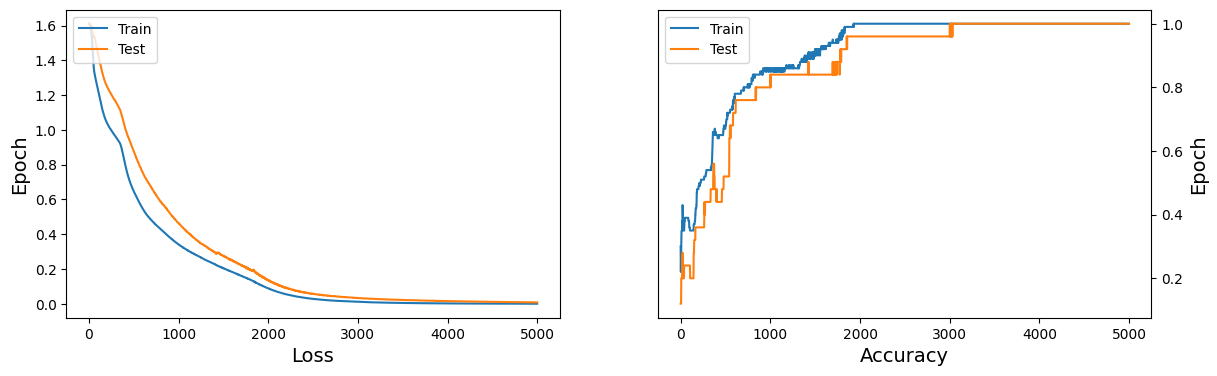

In [13]:
f, axes = plt.subplots(1, 2, figsize=(14, 4))

axes[0].plot(history.history['loss'])
axes[0].plot(history.history['val_loss'])
axes[0].set_xlabel('Loss', fontsize=14)
axes[0].set_ylabel('Epoch', fontsize=14)
axes[0].yaxis.tick_left()
axes[0].legend(['Train', 'Test'], loc='upper left')

if 'accuracy' in history.history:
    axes[1].plot(history.history['accuracy'])  # Use 'accuracy' if available
else:
    axes[1].plot(history.history['acc'])  # Fallback to 'acc' if 'accuracy' is not available

axes[1].plot(history.history['val_accuracy'])
axes[1].set_xlabel('Accuracy', fontsize=14)
axes[1].set_ylabel('Epoch', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(['Train', 'Test'], loc='upper left')

plt.show()


In [14]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import numpy as np

# Assuming classifier is your Keras model

# Use predict to get class probabilities
y_prob = classifier.predict(X_test)

# Extract the predicted classes
y_pred = np.argmax(y_prob, axis=1)

# Calculate the confusion matrix
cm = metrics.confusion_matrix(np.argmax(y_test, axis=1), y_pred)


1/1 [==============================] - 0s 313ms/step


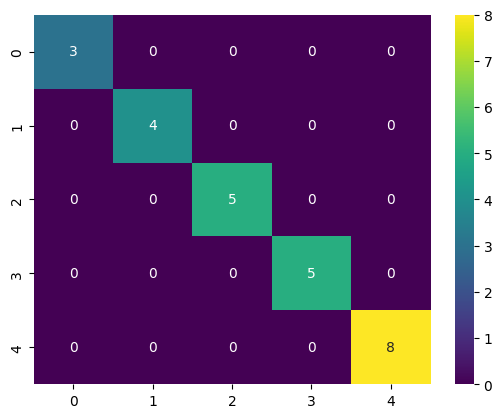

In [16]:
sns.heatmap(cm, annot=True, cmap = 'viridis')
plt.show()

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test, axis=1), y_pred, average='weighted')
recall = recall_score(np.argmax(y_test, axis=1), y_pred, average='weighted')
f1 = f1_score(np.argmax(y_test, axis=1), y_pred, average='weighted')

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00


In [18]:
from keras.models import load_model
import joblib

In [40]:
classifier

In [41]:
classifier.save(r'D:\agriaku\my_model_ann.h5')

In [19]:
model_filename = r'D:\agriaku\my_model_ann_2.pkl'
joblib.dump(classifier, model_filename)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-09-16 09:32:45         1894
metadata.json                                  2023-09-16 09:32:45           64
variables.h5                                   2023-09-16 09:32:45        25168


['D:\\agriaku\\my_model_ann_2.pkl']